#  Install package

In [60]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
! pip instal contextily
! pip instal matplotlib_scalebar

ERROR: unknown command "instal" - maybe you meant "install"

ERROR: unknown command "instal" - maybe you meant "install"



# Import package

In [61]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle


# Define Solution class
Please run the following cell to define the functions

In [62]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [63]:
# isReview = True
isReview = False

In [64]:
# Case 1
# task_name ='Census_map'
# TASK = r'''1. Create a thematic map to show the Census block group population. The location is Centre County, PA, USA. 
# 2. Carefuly design the map, make it beautiful and aesthetic appeal. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LMM-Cat".
# 3. The map dimension is letter (8*11 inches) size.
# 4. Add a basemap.
# '''



# # Case 2:
# DATA_LOCATIONS = [
#     """Population file, GeoPackage format: E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg. Only one layer, no need to load it using a layer name. The population is in the 'totalpopulation' column. The map projection is Lambert Conformal Conic, EPSG 6564, StatePlane Pennsylvania South. The unit is meter.
#     """
# ]

# Case 2:

task_name = 'map_matrix'

TASK = r""" 1. Create a choropleth map to show the per capita GDP of African countries in the year 2022. The map should has two parts. You need to show a large choropleth African continent submap with all African countries on the left half, and another map matrix of 9 rows * 6 columns on the right half, each submap in the map matrix shows an individual country in Africa, ordered by the per capita GDP; the color of the countries in the map matrix should as the same as their colors in the continent map. 
2. Carefully design the map, make it beautiful, and aesthetic appeal. The title, north arrow, scalebar, legend, and designer are needed. The designer is 'LMM-Cat'.
3. The map dimension is the landscape letter (11*8 inches) size.
"""

DATA_LOCATIONS = [
"""
"Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The country name column is 'COUNTRY'. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_georeg'; 'AFR' indicates Africa in this column. The 2022 GDP column is 'country_per_capita_GDP_2022'
"""
]


save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
model = r'gpt-4-turbo'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography for more than 20 years and know every detail and pitfall when visualizing spatial data and coding. You know how to set up workflows for cartography tasks well. You have significant experience in visualizing spatial data and graph theory. You are also experienced in generating maps using Matplotlib, GeoPandas, and other interactive Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualizing the data add map elements such as title, legend, scalebar, label, and annotation.:  
  1. Create a choropleth map to show the per capita GDP of African countries in the year 2022. The map should has two parts. You need to show a large choropleth African continent submap with all African countries on the left half, and another map matrix of 9 rows * 6 columns on t

## Get graph code from GPT API

In [65]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

# Create a Directed Graph
G = nx.DiGraph()

# Nodes and edges
# Data nodes
G.add_node("GDP_data_path", node_type="data", data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg", description="Path to GeoPackage file containing GDP data")
G.add_node("African_countries_data", node_type="data", description="GeoDataFrame with GDP data filtered for African countries")
G.add_node("ordered_gdp_data", node_type="data", description="GDP data ordered by per capita GDP")
G.add_node("choropleth_map_option", node_type="data", description="Options and style for choropleth map")
G.add_node("individual_maps_data", node_type="data", description="Data prepared for individual country maps on a matrix format")
G.add_node("final_map_output", node_type="data", description="Final output map as a single composite image")

# Operation nodes
G.add_node("load_GDP_data", node_type="operation", description="Load GDP data from GeoPackage")
G.add_node("filter_African_countries", node_type="operation", description="Filter data to include only African countries")
G.add_node("sort_data_by_GDP", node_type="operation", description="Sort GDP data by per capita GDP for ordering in the matrix map")
G.add_node("create_choropleth_map", node_type="operation", description="Create choropleth map of African continent")
G.add_node("prepare_individual_maps", node_type="operation", description="Prepare individual maps of each African country")
G.add_node("assemble_final_map", node_type="operation", description="Assemble the final map with all components including map elements")

# Map elements
G.add_node("add_title", node_type="operation", description="Add title to the map")
G.add_node("add_legend", node_type="operation", description="Add legend to the map")
G.add_node("add_scalebar", node_type="operation", description="Add scalebar to the map")
G.add_node("add_north_arrow", node_type="operation", description="Add north arrow to the map")
G.add_node("add_designer_credit", node_type="operation", description="Add designer's credit: 'LMM-Cat'")

# Edges
G.add_edge("GDP_data_path", "load_GDP_data")
G.add_edge("load_GDP_data", "African_countries_data")
G.add_edge("African_countries_data", "filter_African_countries")
G.add_edge("filter_African_countries", "ordered_gdp_data")
G.add_edge("ordered_gdp_data", "sort_data_by_GDP")
G.add_edge("sort_data_by_GDP", "choropleth_map_option")
G.add_edge("choropleth_map_option", "create_choropleth_map")
G.add_edge("create_choropleth_map", "prepare_individual_maps")
G.add_edge("prepare_individual_maps", "individual_maps_data")
G.add_edge("individual_maps_data", "assemble_final_map")
G.add_edge("assemble_final_map", "final_map_output")
G.add_edge("final_map_output", "add_title")
G.add_edge("add_title", "add_legend")
G.add_edge("add_legend", "add_scalebar")
G.add_edge("add_scalebar", "add_north_arrow")
G.add_edge("add_north_arrow", "add_designer_credit")

# Save the graph
nx.write_graphml(G, "e:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix\\map_matrix.graphml")

## Execute code to generate the solution graph

In [66]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

e:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\map_matrix.html


## Generate prompts and code for operations (functions)

In [67]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    # Description: Load GDP data from GeoPackage and filter for African countries
    gdf = gpd.read_file(GDP_data_path)
    African_countries_data = gdf[gdf['UN_Geodata_simplified_georeg'] == 'AFR']
    # Keeping only the necessary columns
    African_countries_data = African_countries_data[['COUNTRY', 'country_per_capita_GDP_2022', 'geometry']]
    return African_countries_data
def filter_African_countries(African_countries_data):
    # Description: Filter data to include only African countries
    ordered_gdp_data = African_countries_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)
    return ordered_gdp_data
def sort_data_by_GDP(ordered_gdp_data):
    # Description: Sort GDP data by per capita GDP for ordering in the matrix map
    choropleth_map_option = ordered_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=True)
    return choropleth_map_option
import geopandas as gpd
import matplotlib.pyplot as plt

def create_choropleth_map(choropleth_map_option):
    # Description: Create choropleth map of African continent
    fig, ax = plt.subplots(figsize=(11, 8))  # Letter size, but horizontally to fit both parts
    # Plotting the continent choropleth map
    choropleth_map_option.plot(ax=ax, column='country_per_capita_GDP_2022', cmap='viridis', legend=True, edgecolor='black')
    ax.set_title('Per Capita GDP of African Countries 2022')
    ax.set_axis_off()

    # Finalize and show plot
    plt.tight_layout()
    plt.savefig('continent_choropleth_map.png', dpi=100)
    plt.close()

    return prepare_individual_maps
import geopandas as gpd
import matplotlib.pyplot as plt

def prepare_individual_maps(create_choropleth_map=create_choropleth_map):
    # Description: Prepare individual maps of each African country
    ordered_gdp_data = sort_data_by_GDP(filter_African_countries(load_GDP_data()))
    # Retrieve the color mapping from the continent choropleth map
    cmap = plt.get_cmap('viridis')
    min_gdp = ordered_gdp_data['country_per_capita_GDP_2022'].min()
    max_gdp = ordered_gdp_data['country_per_capita_GDP_2022'].max()
    norm = plt.Normalize(vmin=min_gdp, vmax=max_gdp)

    num_rows, num_cols = 9, 6
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(11, 8))
    country_plots = ordered_gdp_data.iterrows()

    for i in range(num_rows):
        for j in range(num_cols):
            ax = axs[i, j]
            try:
                country_data = next(country_plots)
                country_data[1].geometry.plot(ax=ax, color=cmap(norm(country_data[1]['country_per_capita_GDP_2022'])), edgecolor='black')
                ax.set_title(country_data[1]['COUNTRY'], fontsize=8)
                ax.set_axis_off()
            except StopIteration:
                ax.set_axis_off()

    plt.tight_layout()
    plt.savefig('individual_country_maps.png', dpi=100)
    plt.close()

    # Create a dictionary to return the paths of the maps
    individual_maps_data = {
        'continent_choropleth_map': 'continent_choropleth_map.png',
        'individual_country_maps': 'individual_country_maps.png'
    }
    return individual_maps_data
def assemble_final_map(individual_maps_data):
    # Description: Assemble the final map with all components including map elements
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    
    # Load images of continent choropleth map and individual country maps
    continent_map_img = mpimg.imread(individual_maps_data['continent_choropleth_map'])
    individual_country_maps_img = mpimg.imread(individual_maps_data['individual_country_maps'])
    
    # Create a new figure to assemble both maps
    fig, axs = plt.subplots(1, 2, figsize=(8, 11))  # Letter size
    
    # Show continent choropleth map on the left half
    axs[0].imshow(continent_map_img)
    axs[0].axis('off')  #

## Generate prompts and code for assembly program

In [68]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    gdf = gpd.read_file(GDP_data_path)
    African_countries_data = gdf[gdf['UN_Geodata_simplified_georeg'] == 'AFR']
    African_countries_data = African_countries_data[['COUNTRY', 'country_per_capita_GDP_2022', 'geometry']]
    return African_countries_data

def filter_African_countries(African_countries_data):
    ordered_gdp_data = African_countries_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)
    return ordered_gdp_data

def sort_data_by_GDP(ordered_gdp_data):
    choropleth_map_option = ordered_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=True)
    return choropleth_map_option

def create_choropleth_map(choropleth_map_option):
    fig, ax = plt.subplots(figsize=(11, 8))  # Letter size, but horizontally to fit both parts
    choropleth_map_option.plot(ax=ax, column='country_per_capita_GDP_2022', cmap='viridis', legend=True, edgecolor='black')
    ax.set_title('Per Capita GDP of African Countries 2022')
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig('continent_choropleth_map.png', dpi=100)
    plt.close()
    return choropleth_map_option

def prepare_individual_maps(choropleth_map_option):
    ordered_gdp_data = sort_data_by_GDP(filter_African_countries(load_GDP_data()))
    cmap = plt.get_cmap('viridis')
    min_gdp = ordered_gdp_data['country_per_capita_GDP_2022'].min()
    max_gdp = ordered_gdp_data['country_per_capita_GDP_2022'].max()
    norm = plt.Normalize(vmin=min_gdp, vmax=max_gdp)

    num_rows, num_cols = 9, 6
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(11, 8))
    country_plots = ordered_gdp_data.iterrows()

    for i in range(num_rows):
        for j in range(num_cols):
            ax = axs[i, j]
            try:
                country_data = next(country_plots)
                country_data[1].geometry.plot(ax=ax, color=cmap(norm(country_data[1]['country_per_capita_GDP_2022'])), edgecolor='black')
                ax.set_title(country_data[1]['COUNTRY'], fontsize=8)
                ax.set_axis_off()
            except StopIteration:
                ax.set_axis_off()

    plt.tight_layout()
    plt.savefig('individual_country_maps.png', dpi=100)
    plt.close()

    individual_maps_data = {
        'continent_choropleth_map': 'continent_choropleth_map.png',
        'individual_country_maps': 'individual_country_maps.png'
    }
    return individual_maps_data

def assemble_final_map(individual_maps_data):
    continent_map_img = plt.imread(individual_maps_data['continent_choropleth_map'])
    individual_country_maps_img = plt.imread(individual_maps_data['individual_country_maps'])
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 11))  
    axs[0].imshow(continent_map_img)
    axs[0].axis('off')  
    axs[1].imshow(individual_country_maps_img)
    axs[1].axis('off')  

    plt.tight_layout()
    plt.savefig('final_map_output.png', dpi=100)
    plt.close()

    final_map_output = 'final_map_output.png'
    return final_map_output

def add_title(final_map_output):
    fig, ax = plt.subplots(figsize=(8, 11)) 
    img = plt.imread(final_map_output)
    ax.imshow(img)
    ax.set_title('Per Capita GDP of African Countries in 2022', fontsize=18, fontweight='bold', pad=20)
    ax.axis('off')
    plt.savefig(final_map_output, dpi=100)  
    plt.close()
    return final_map_output

def add_legend(final_map_output):
    fig, ax = plt.subplots(figsize=(8, 11))
    img = plt.imread(final_map_output)
    ax.imshow(img)
    ax.axis('off')

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('viridis'), norm=plt.Normalize(vmin=0, vmax=100000))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.04)
    cbar.set_label('GDP per capita (USD)', fontsize=12)
    

## Execute assembly code

In [69]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))
solution.all_code = all_code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 342, in <module>
    assembly_solution()
  File "Complete program", line 333, in assembly_solution
    maps_data = prepare_individual_maps(continent_plotted)
  File "Complete program", line 228, in prepare_individual_maps
    country_data[1].geometry.plot(ax=ax, color=cmap(norm(country_data[1]['country_per_capita_GDP_2022'])), edgecolor='black')
AttributeError: 'MultiPolygon' object has no attribute 'plot'

Sending error information to LLM for debugging...
The error in the code is due to trying to call the `plot` method on a `MultiPolygon` object directly. In GeoPandas, we need to call the `plot` method on a GeoDataFrame or GeoSeries object. The error occurs because the code is trying to use the `plot` method on the geometry attribute of a row in the GeoDataFrame, which directly returns a `MultiPolygon` object rather than a GeoDataFrame or Ge

import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Load country GDP data from GeoPackage
gdp_data = gpd.read_file("E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg")

# Filter to only include African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Sort countries by per capita GDP 2022
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Define color mapping based on GDP
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list("GDP_color_map", ["blue", "green", "yellow", "red"])

# Create figure and subplots for the continental view and the matrix map
fig, axes = plt.subplots(9, 6, figsize=(8, 11))  # Configured for a grid of 9 rows and 6 columns

# Large continental choropleth map
continent_ax = plt.subplot2grid((9, 6), (0, 0), rowspan=9, colspan=3, fig=fig)
ordered_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, legend=True, edgecolor='black', legend_kwds={'label': "GDP (USD)"})
continent_ax.set_title('African Continent GDP 2022')
continent_ax.axis('off')

# Map matrix for each country, ordered by GDP
for i, (idx, country_data) in enumerate(ordered_gdp_data.iterrows()):
    row, col = divmod(i, 2)  # Adjusting to layout in 2 columns in the right half
    ax = axes[row, col + 3]
    # Create a temporary GeoDataFrame for plotting
    temp_gdf = gpd.GeoDataFrame([country_data], columns=country_data.index, crs=ordered_gdp_data.crs)
    temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
    ax.set_title(country_data['COUNTRY'], fontsize=10)
    ax.axis('off')

# Adding map design elements
fig.suptitle('Choropleth Map of Per Capita GDP in African Countries (2022)', fontsize=16, fontweight='bold')
continent_ax.text(5, -35, 'Design by LMM-Cat', fontsize=8, ha='right')

# Save the map
plt.savefig('output_map.png', dpi=100)
plt.show()

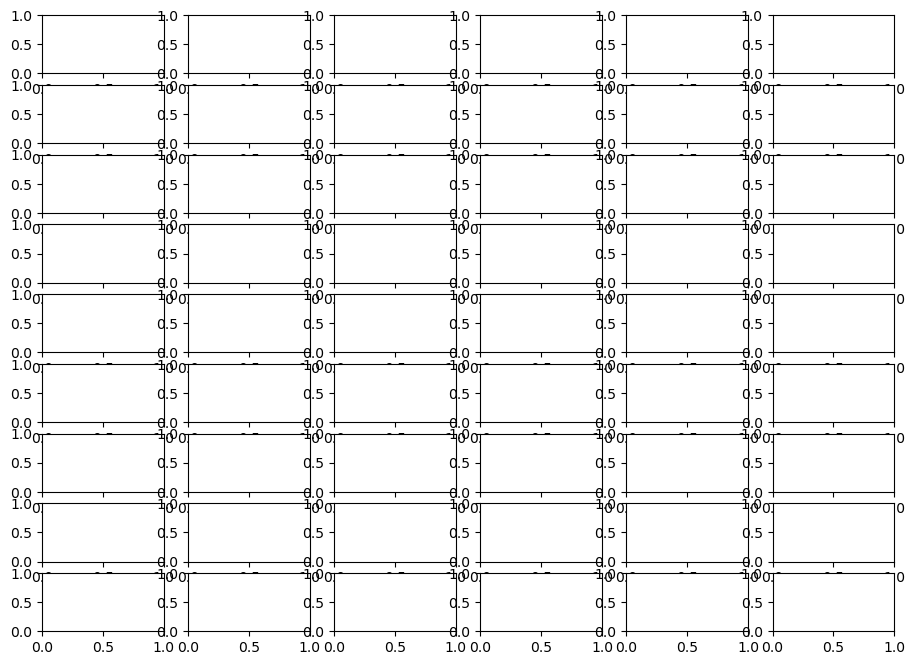

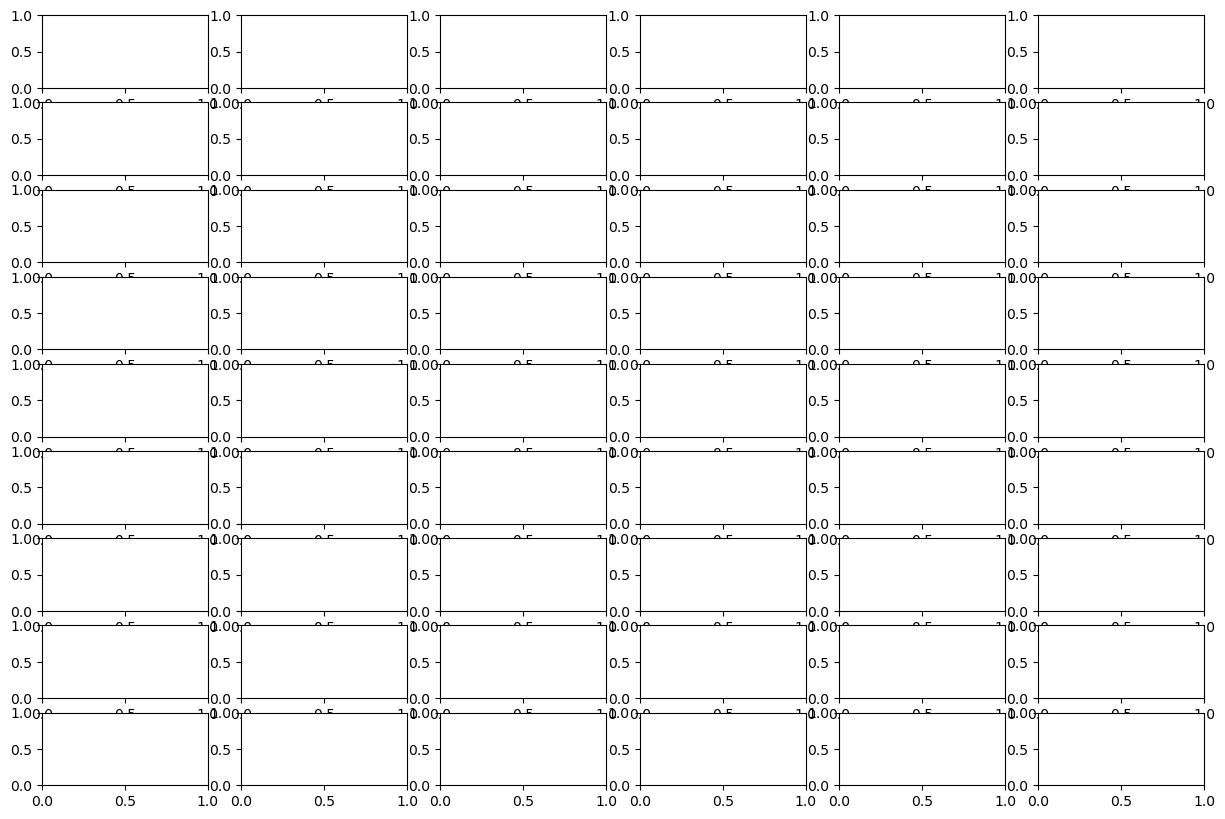

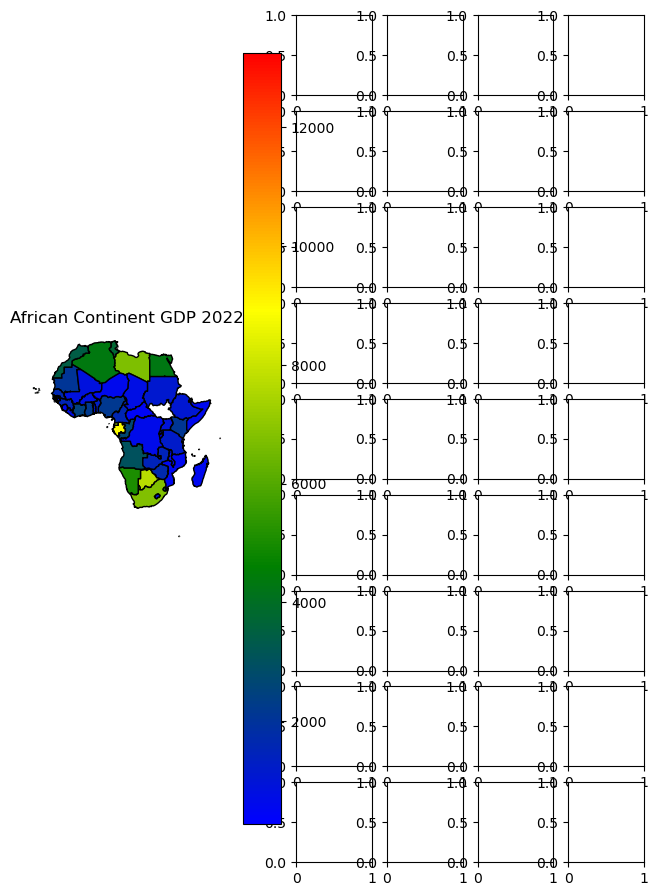

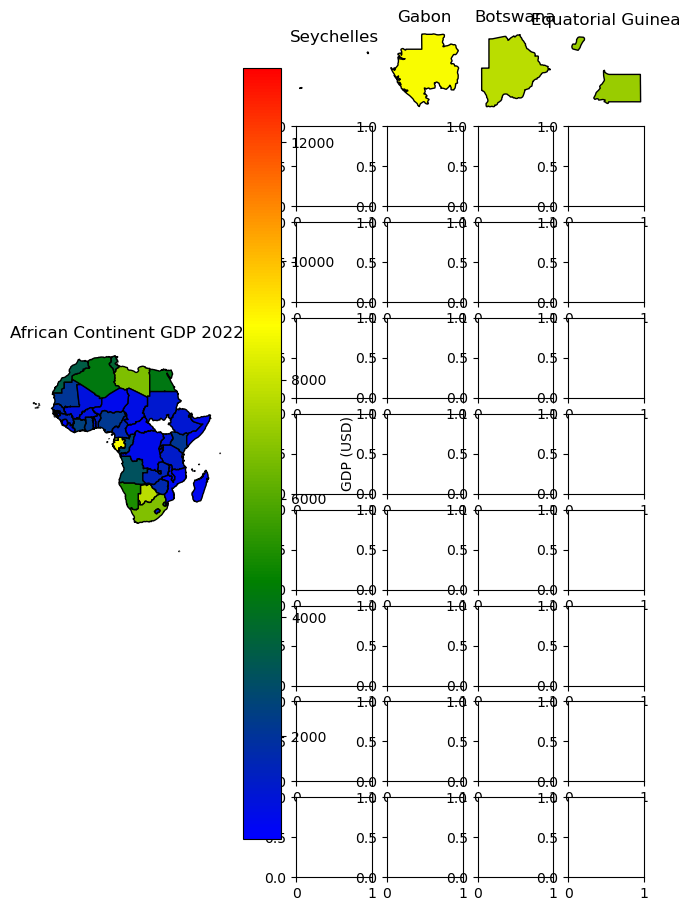

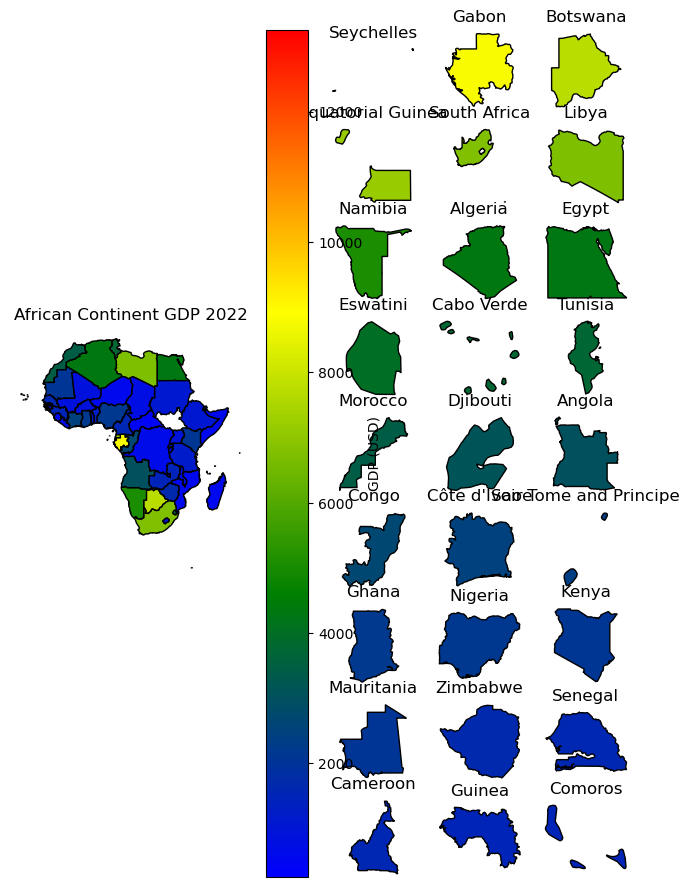

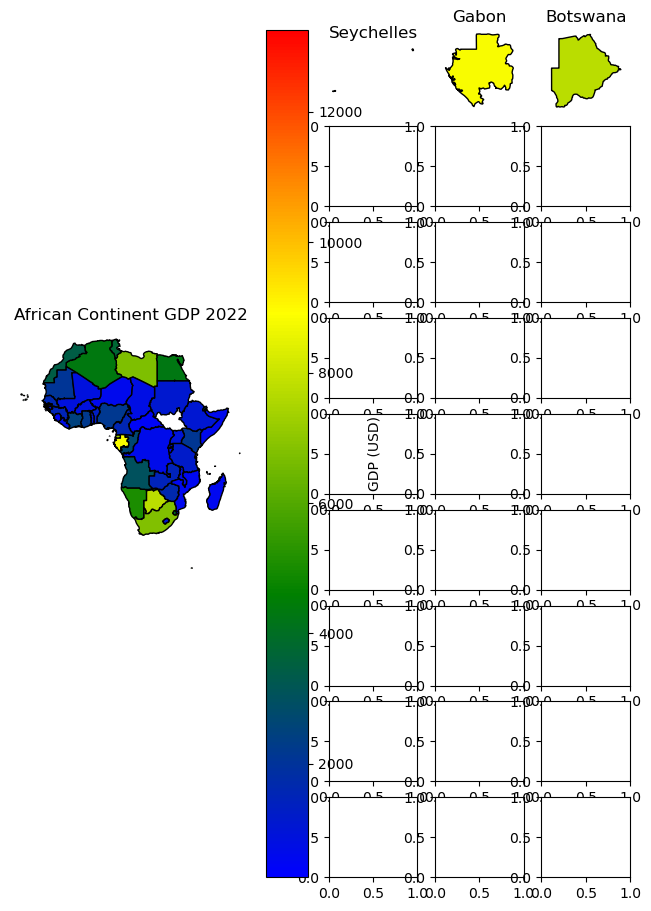

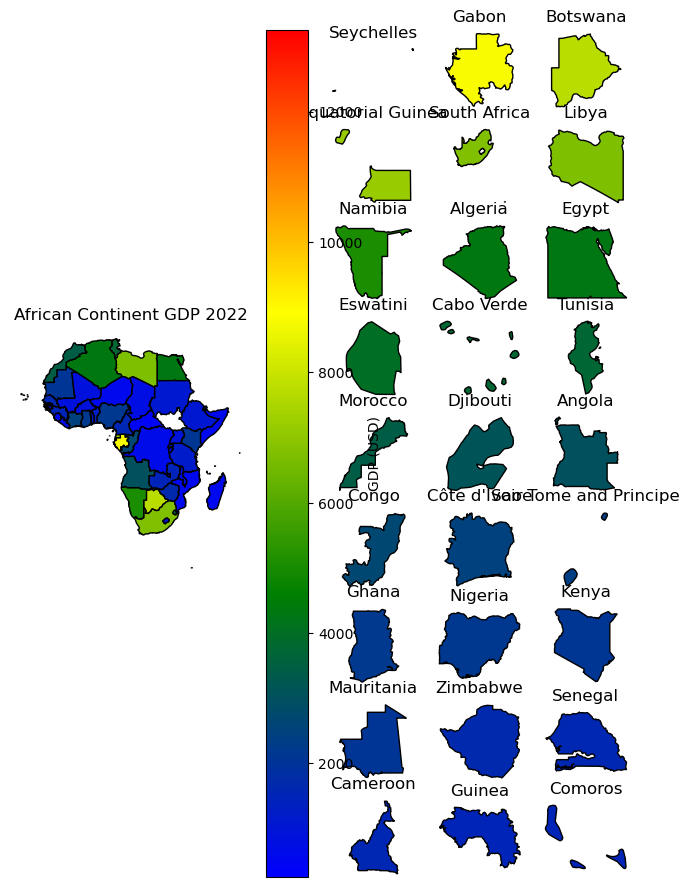

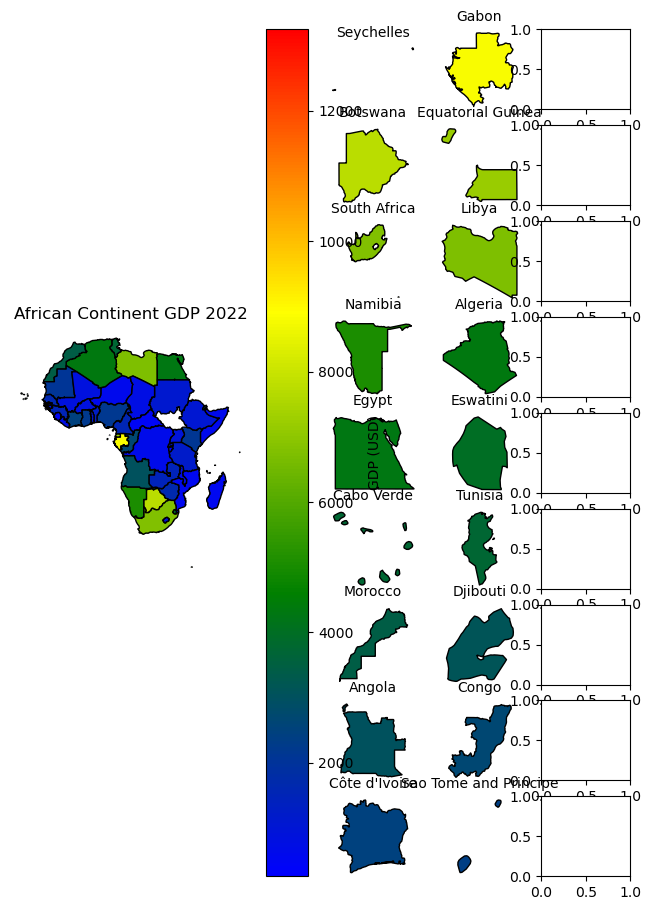

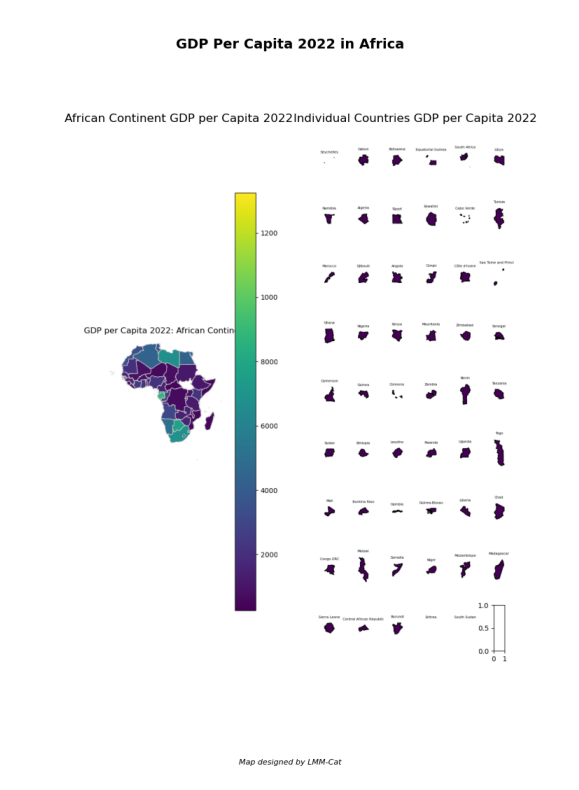

In [70]:
all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"
from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)
    
show_map()   
display(Code(all_code, language='python'))

In [71]:
# display(Code(all_code, language='python'))

# Beautify map

In [72]:
print(solution.get_review_prompt())

Your role: A professional cartographer. You have worked on cartography for more than 20 years and know how to design an aesthetic appeal map. Your current job is to review the map generated by AI. You need to detail the issues with the given map so that the AI can improve the map later. Note that AI makes the map via generated code, so your comments should be suitable for improvements by code. The map requirements are also provided.
 
Your task: Observe the given map carefully using the viewpoint of an experienced cartographer. 

Requirements: 
1. Elaborate on the issues, then provide specific and actionable improvements, such as 'move the legend to the up-left to void obscuring'. If you think there is no issue, no need to mention it.
2. Whether the title semantically meets;[]  the data and map requirement.
3. Whether the fonts and font sizes are suitable and hierachical.
4. Wheter the map is in the center.
5. Whether the legend or colorbar use the some colormap.
6. Whether the positio

## Map review

Error in get_LLM_reply(), will sleep 10 seconds, then retry 2/5: 
 Error code: 500 - {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_94f195f487f4c0342e2aa01bc24eb05c in your email.)', 'type': 'server_error', 'param': None, 'code': None}}
Error in get_LLM_reply(), will sleep 10 seconds, then retry 5/5: 
 Error code: 500 - {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_aa45004e646307a1b05a4290b95d889f in your email.)', 'type': 'server_error', 'param': None, 'code': None}}
1. The title is misleading as it seems to suggest the map covers both continental and individual countries' GDP per capita for 2022, but t

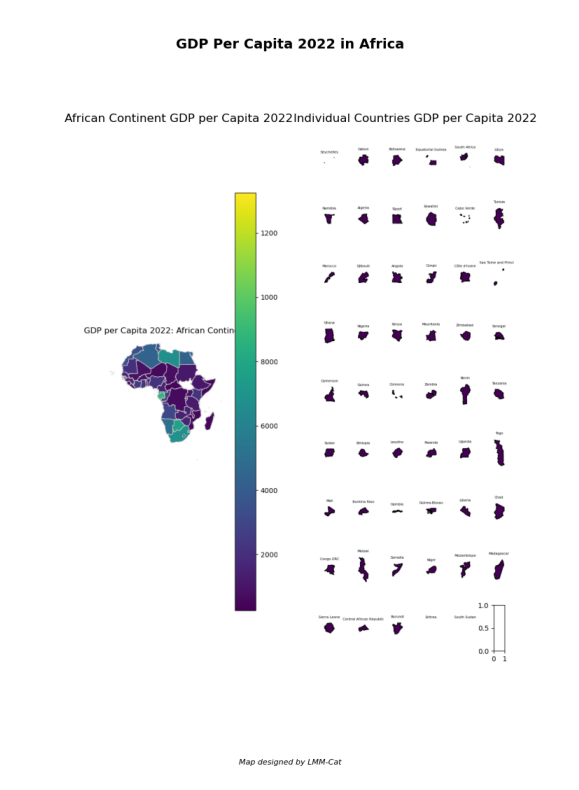

In [73]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"

# Getting the base64 string
base64_image = encode_image(image_path)

from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)


solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

show_map()

## Beautify 1

Revising the map, trial 1 / 1
Error in get_LLM_reply(), will sleep 10 seconds, then retry 1/5: 
 Error code: 500 - {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_6f32119189b77507711a4625c3d7a0f3 in your email.)', 'type': 'server_error', 'param': None, 'code': None}}
Error in get_LLM_reply(), will sleep 10 seconds, then retry 2/5: 
 Error code: 500 - {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_8611441d976cae510a55c0e672829987 in your email.)', 'type': 'server_error', 'param': None, 'code': None}}
Error in get_LLM_reply(), will sleep 10 seconds, then retry 3/5: 
 Error code: 500 - {'error': {'message': '

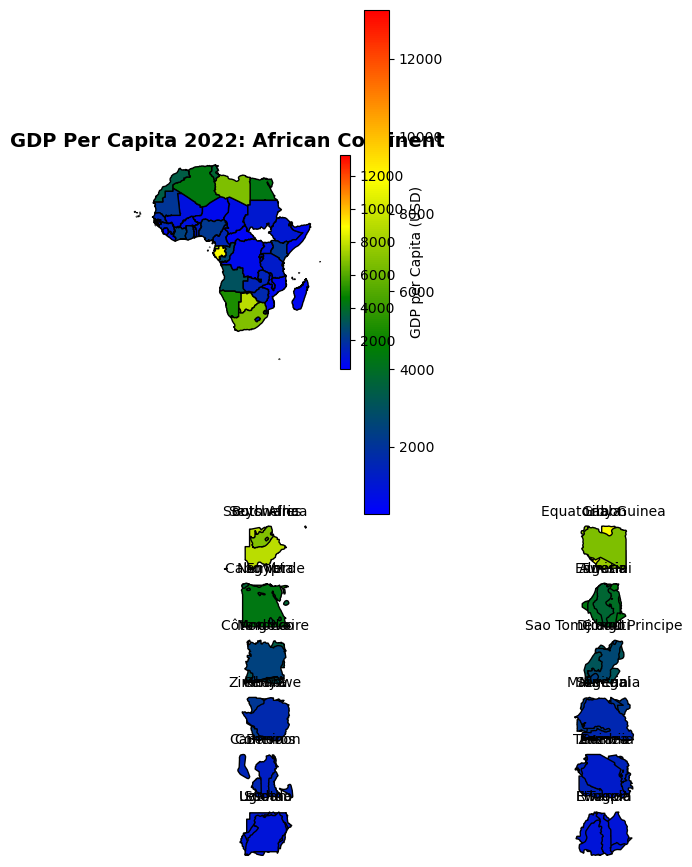

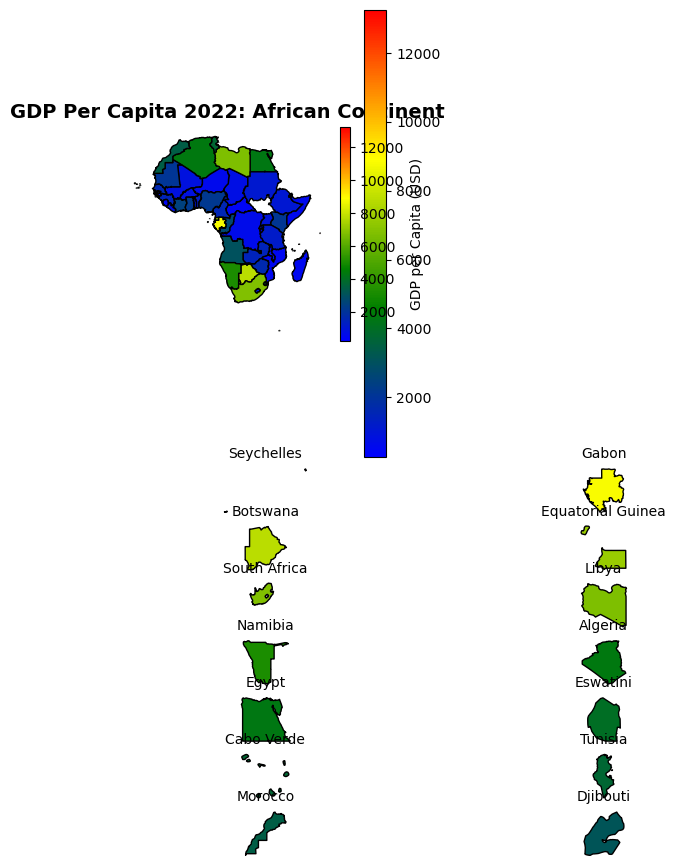

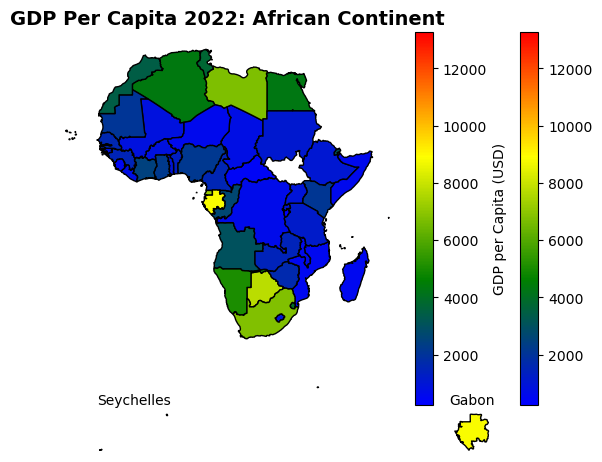

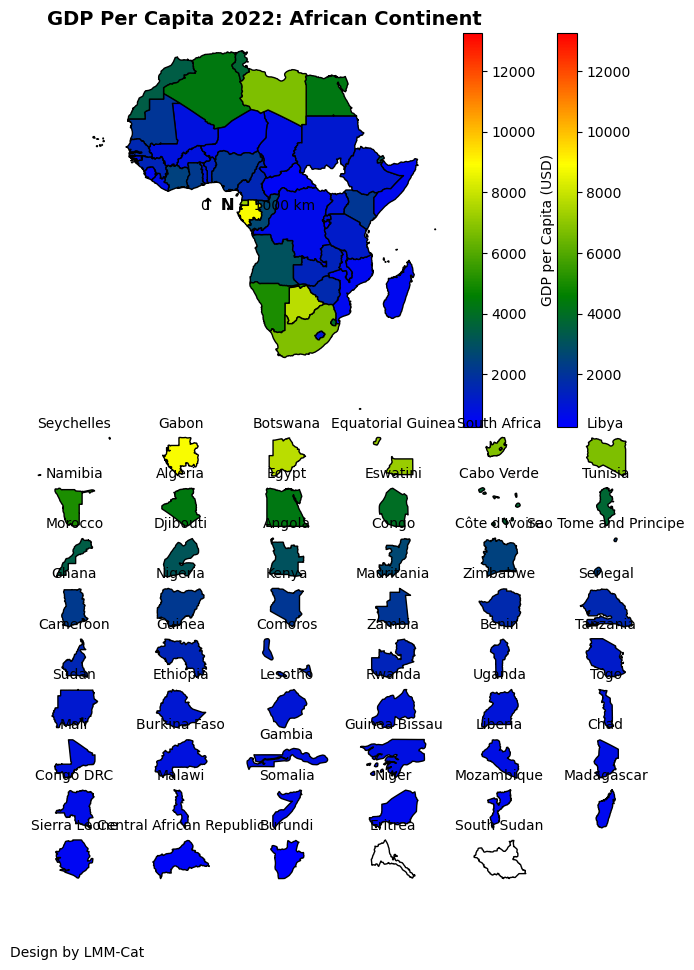



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Reading GDP data
gdp_data = gpd.read_file("E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Cat/ESRI_countries_4326_GDP.gpkg")

# Filtering African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Ordering based on GDP
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Normalization and color map configuration
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list('GDP_color_map', ['blue', 'green', 'yellow', 'red'])

# Figure and grid specs
fig = plt.figure(figsize=(8, 11))  # Letter size
gs = fig.add_gridspec(17, 6)  # Adjusting rows for map matrix

# Continental map
continent_ax = fig.add_subplot(gs[:8, :])
africa_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, legend=True, edgecolor='black')
continent_ax.set_title('GDP Per Capita 2022: African Continent', fontsize=14, fontweight='bold')
continent_ax.axis('off')

# Color bar configuration
divider = make_axes_locatable(continent_ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('GDP per Capita (USD)')

# Individual country plotting
for j in range(54):
    ax = fig.add_subplot(gs[8 + (j // 6), (j % 6)])  # Adjust index calculation for 54 countries
    if j < len(ordered_gdp_data):
        country_data = ordered_gdp_data.iloc[j]
        temp_gdf = gpd.GeoDataFrame([country_data], geometry=[country_data.geometry], crs=ordered_gdp_data.crs)
        temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
        ax.set_title(country_data['COUNTRY'], fontsize=10)
    ax.axis('off')

# Map decorations
continent_ax.text(s='↑ N', x=0.1, y=0.1, fontsize=12, fontweight='bold')
continent_ax.text(s='0          1000 km', x=0.1, y=0.08, fontsize=10)
fig.text(s='Design by LMM-Cat', x=0.1, y=0.04, fontsize=10, transform=fig.transFigure)

# Save the result
plt.savefig('output_map.png', dpi=100, bbox_inches='tight')
plt.show()

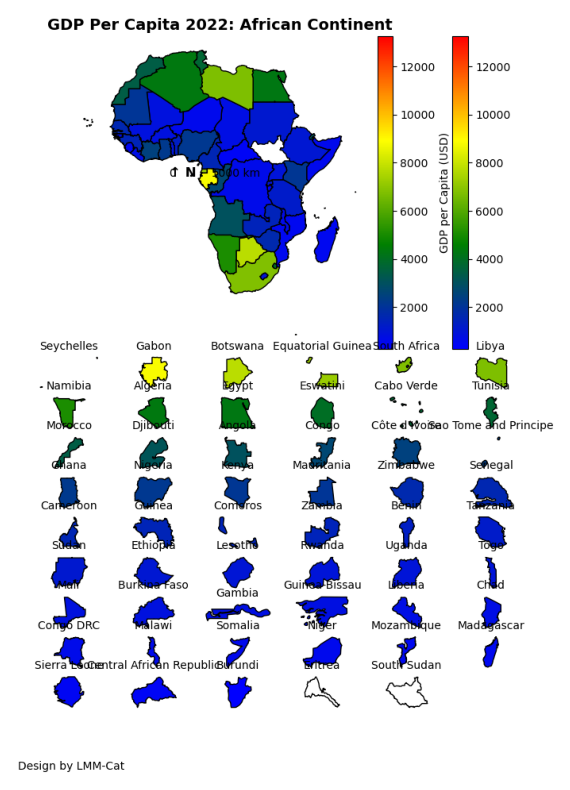

In [74]:
# solution.get_beautify_text_prompt(solution.all_code)

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
 
 
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

  
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 2

Revising the map, trial 1 / 1
Current map issues:
1. **Title Font Size**: The main title font size is too small to stand out adequately.
2. **Color Contrast**: There is insufficient contrast between some country colors in the choropleth, reducing legibility, especially for lower GDP values which are closer in color spectrum.
3. **North Arrow and Scale Bar**: The north arrow and scale bar are stylistically simplistic and their placement is suboptimal; the north arrow could benefit from being more distinct and the scale bar should align to international cartography standards.
4. **Legend Clarity**: The color bar is duplicated and overly dominant in height; it should be simplified and better integrated into the layout.
5. **Submap Labels**: The font size for country names in the matrix is inconsistent with the readability when printed or displayed on various screens.
6. **Overall Aesthetics**: The placement of the "Design by LMM-Cat" is somewhat casual and could be better integrated.

Imp

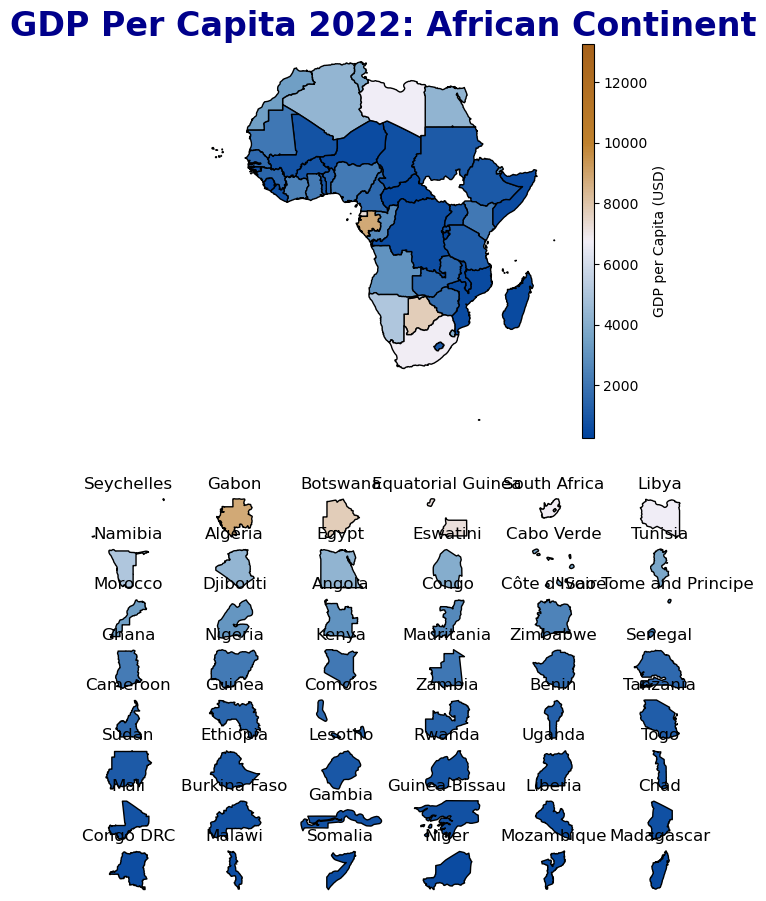

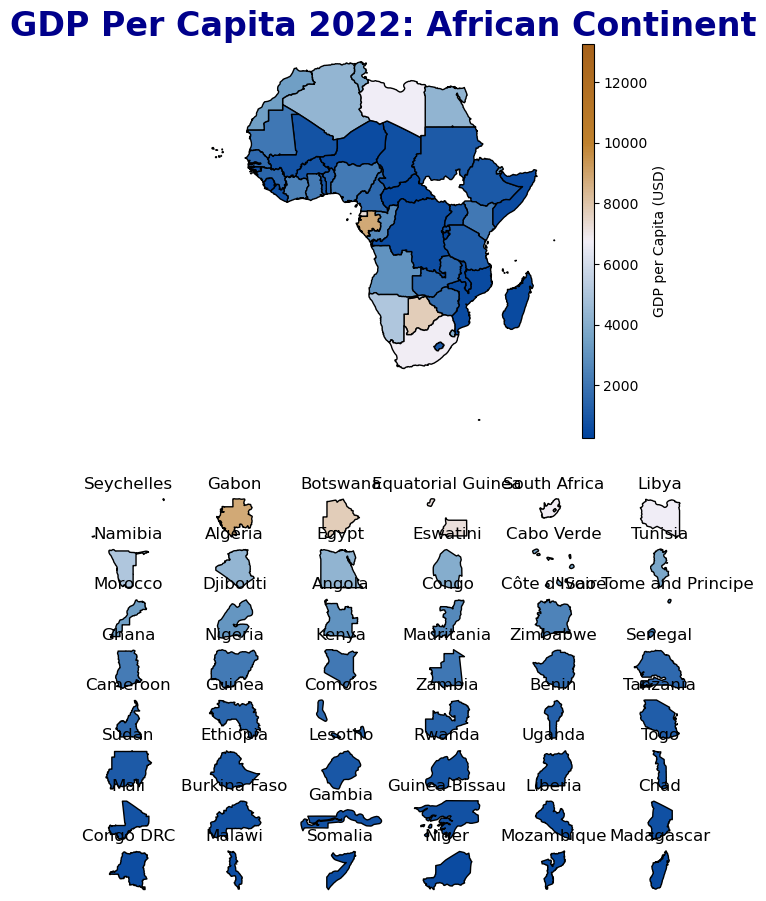

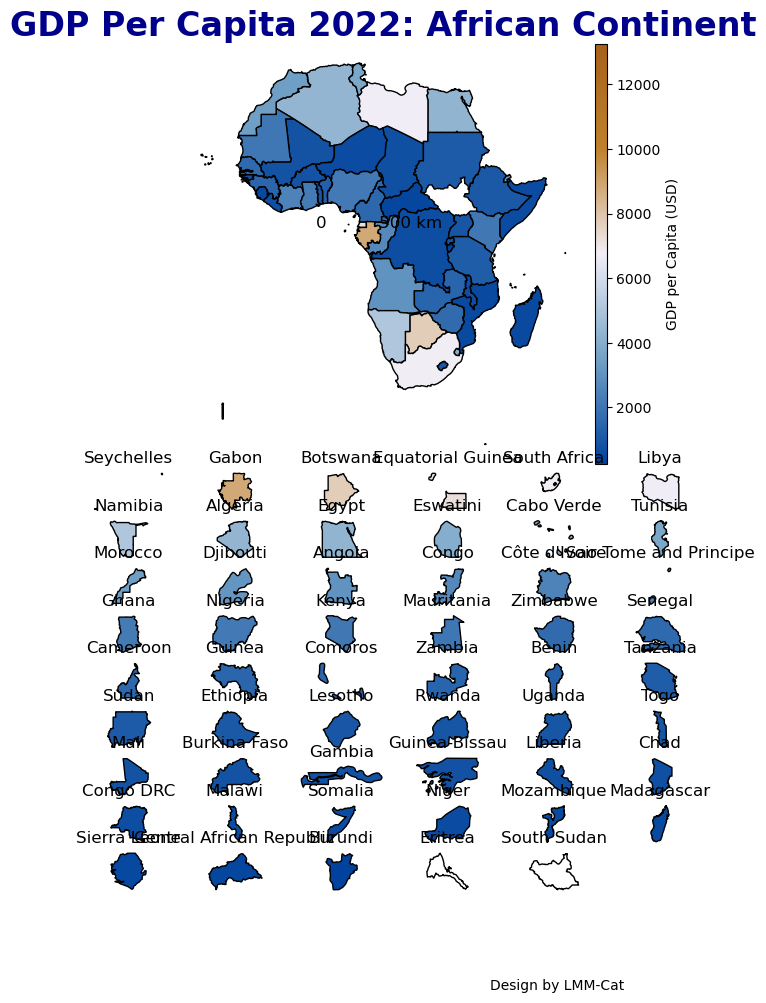



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Reading GDP data
gdp_data = gpd.read_file("E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Cat/ESRI_countries_4326_GDP.gpkg")

# Filtering African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Ordering based on GDP
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Normalization and color map configuration
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list('GDP_color_map', ['#00429d', '#73a2c6', '#f1eef6', '#bf812d', '#a6611a'])

# Figure and grid specs
fig = plt.figure(figsize=(8, 11))  # Letter size
gs = fig.add_gridspec(nrows=18, ncols=6)  # Updated to specify nrows and ncols explicitly

# Continental map
continent_ax = fig.add_subplot(gs[:9, :])  # Keeps the continent map to 9 rows height, half of 18
africa_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, edgecolor='black')
continent_ax.set_title('GDP Per Capita 2022: African Continent', fontsize=24, fontweight='bold', color='darkblue')
continent_ax.axis('off')

# Color bar configuration
divider = make_axes_locatable(continent_ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('GDP per Capita (USD)')

# Individual country plotting
for j in range(54):
    ax = fig.add_subplot(gs[9 + (j // 6), (j % 6)])  # Corrected grid specification to allocate proper space
    if j < len(ordered_gdp_data):
        country_data = ordered_gdp_data.iloc[j]
        temp_gdf = gpd.GeoDataFrame([country_data], geometry=[country_data.geometry], crs=ordered_gdp_data.crs)
        temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
        ax.set_title(country_data['COUNTRY'], fontsize=12)
    ax.axis('off')

# Map decorations
styled_north_arrow = mpatches.FancyArrowPatch((0.1, 0.1), (0.1, 0.15), transform=continent_ax.transAxes, color='black', arrowstyle='simple', linewidth=1.5)
continent_ax.add_patch(styled_north_arrow)
continent_ax.text(s='0          500 km', x=0.1, y=0.2, fontsize=12, ha='left', va='bottom')
fig.text(s='Design by LMM-Cat', x=0.8, y=0.02, fontsize=10, transform=fig.transFigure, ha='right')

# Save the result
plt.savefig('output_map.png', dpi=100, bbox_inches='tight')
plt.show()

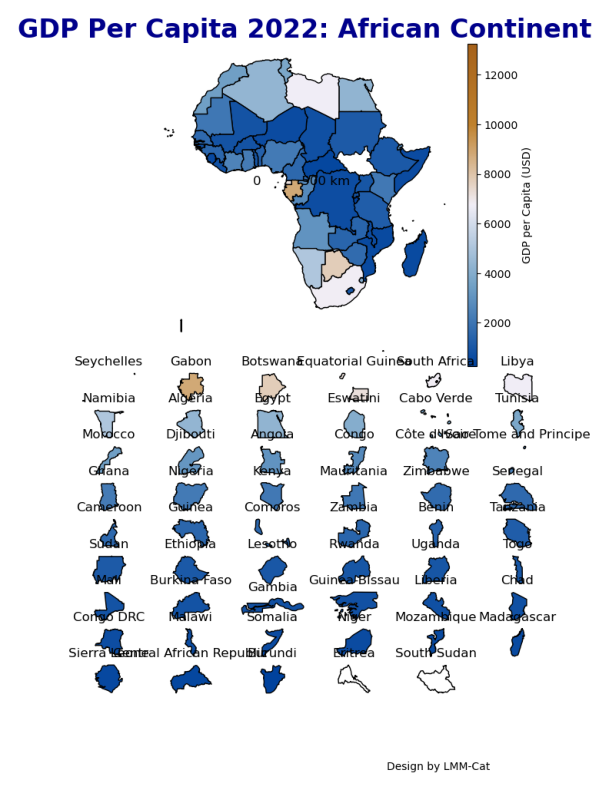

In [75]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()


show_map()
display(Code(all_code, language='python'))



## Beautify 3

Revising the map, trial 1 / 1
Current map issues:
1. The continental map and individual country maps are not clearly separated, causing visual confusion.
2. The title size and style are inconsistent across the main map and sub-maps.
3. The overall color palette could be more harmonic and easier on the eyes.
4. The scale bar design is too simplistic and lacks detailed unit measurement.
5. The north arrow representation is rudimentary and not very clear.
6. The legend on the right is oversized in comparison to the map, dominating the visual space unnecessarily.
7. The smaller country maps lack a unified base map, which causes inconsistency in geographical representation.
8. The designer credit is positioned oddly, and the font is too small.

Improvement:
1. Separate the continental map visually from the grid of countries using border lines.
2. Harmonize the title size and style across all subplots for consistency.
3. Simplify and soften color schemes for better visual appeal.
4. Enhance 

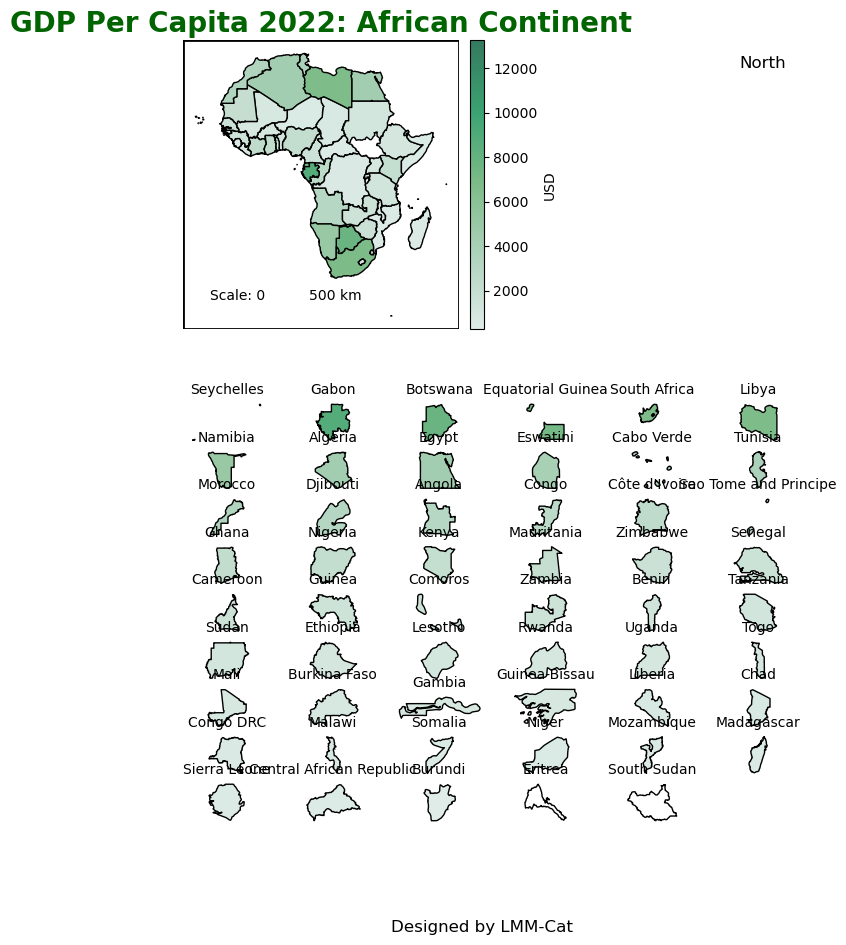



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Reading GDP data
gdp_data = gpd.read_file("E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Cat/ESRI_countries_4326_GDP.gpkg")

# Filtering African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Ordering based on GDP
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Normalization and color map configuration
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list('GDP_color_map', ['#dfece8', '#afd3bd', '#7ebc89', '#3ba372', '#357a5f'])

# Figure and grid specs
fig = plt.figure(figsize=(8, 11))  # Letter size
gs = fig.add_gridspec(nrows=18, ncols=6)

# Continental map
continent_ax = fig.add_subplot(gs[:9, :3])
africa_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, edgecolor='black')
continent_ax.set_title('GDP Per Capita 2022: African Continent', fontsize=20, fontweight='bold', color='darkgreen')
continent_ax.axis('off')

# Adding border for clear separation
continent_ax.add_patch(mpatches.Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', lw=2, transform=continent_ax.transAxes))

# Color bar configuration
divider = make_axes_locatable(continent_ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('USD')

# Map decorations
styled_north_arrow = mpatches.FancyArrowPatch((0.85, 0.85), (0.85, 0.95), transform=fig.transFigure, color='black', arrowstyle='simple', linewidth=1.5)
continent_ax.add_patch(styled_north_arrow)
continent_ax.text(0.85, 0.8, 'North', horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12)

continent_ax.text(0.1, 0.1, 'Scale: 0          500 km', fontsize=10, transform=continent_ax.transAxes)

# Individual country plotting
for j in range(54):
    ax = fig.add_subplot(gs[9 + (j // 6), (j % 6)])
    if j < len(ordered_gdp_data):
        country_data = ordered_gdp_data.iloc[j]
        temp_gdf = gpd.GeoDataFrame([country_data], geometry=[country_data.geometry], crs=ordered_gdp_data.crs)
        temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
        ax.set_title(country_data['COUNTRY'], fontsize=10)
    ax.axis('off')

# Designer credit
fig.text(s='Designed by LMM-Cat', x=0.5, y=0.01, fontsize=12, transform=fig.transFigure, ha='center')

# Save the result
plt.savefig('output_map.png', dpi=100, bbox_inches='tight')
plt.show()

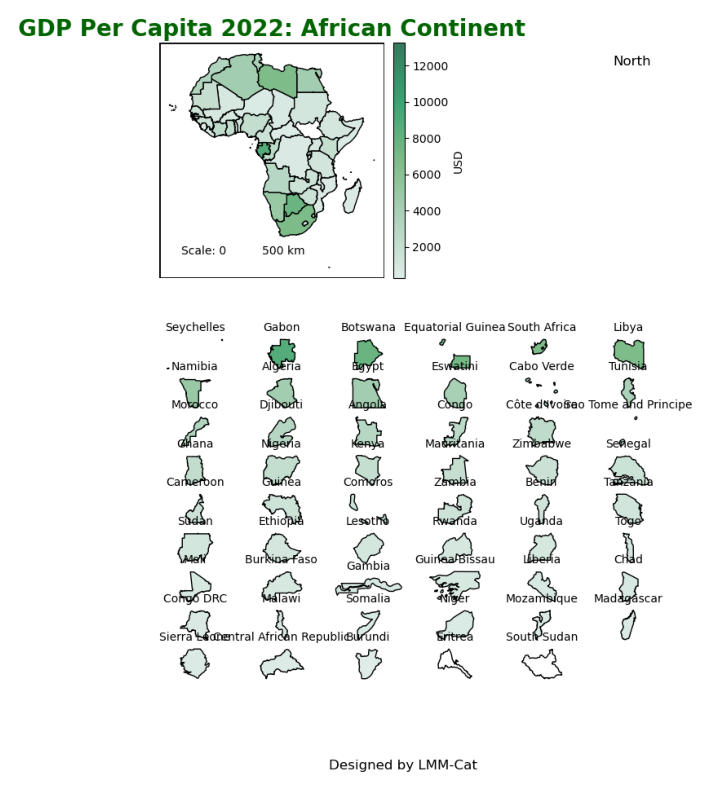

In [76]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 4

Revising the map, trial 1 / 1
Current map issues:
1. **Title Clarity and Visibility**: The main title on the continental map lacks contrast with the map background, making it less visible.
2. **Consistency in FontStyle and Size**: The title of each country in the matrix is not consistent in style and is relatively small, making them difficult to read.
3. **Border Definition**: The border on the continental map is not enough for clear separation from the individual countries in the matrix, which might confuse the viewer.
4. **Scale Bar Representation**: The scale representation '0 500 km' lacks clarity and professional appearance. Additionally, it is not sufficiently prominent.
5. **North Indicator Style**: The north arrow is simple and lacks symbolic representation, affecting the aesthetic and functional aspects.
6. **Map Element Spacing and Placement**: The placement of the color bar and the designer's credit could be optimized to enhance readability and balance.
7. **Color Scheme Con

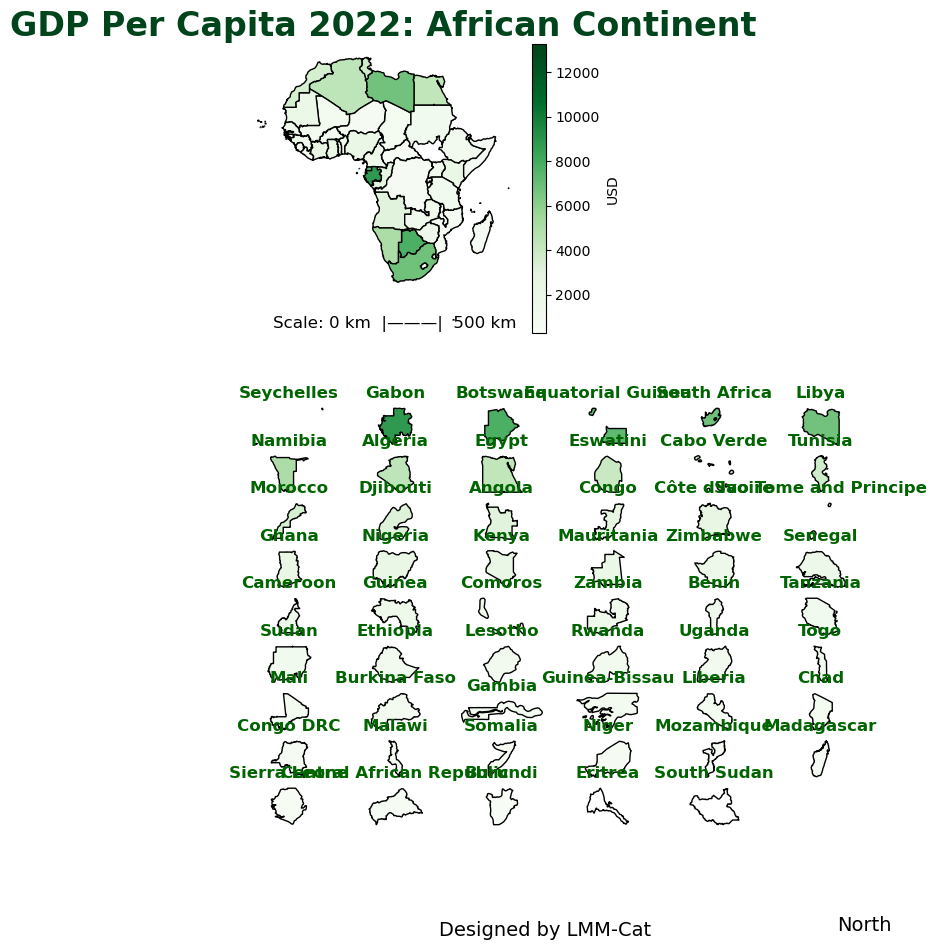



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Reading GDP data
gdp_data = gpd.read_file("E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Cat/ESRI_countries_4326_GDP.gpkg")

# Filtering African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Ordering based on GDP
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Normalization and color map configuration
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list('GDP_color_map', ['#f7fcf5', '#e5f5e0', '#a1d99b', '#41ab5d', '#006d2c', '#00441b'])

# Figure and grid specs
fig = plt.figure(figsize=(8, 11))  # Letter size
gs = fig.add_gridspec(nrows=18, ncols=6)

# Continental map
continent_ax = fig.add_subplot(gs[:9, :3])
africa_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, edgecolor='black', linewidth=1)
continent_ax.set_title('GDP Per Capita 2022: African Continent', fontsize=24, fontweight='bold', color='#00441b')
continent_ax.axis('off')

# Adding border for clear separation
continent_ax.add_patch(mpatches.Rectangle((-0.05, -0.05), 1.1, 1.1, fill=False, edgecolor='black', lw=2, transform=continent_ax.transAxes))

# Color bar configuration
divider = make_axes_locatable(continent_ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('USD')

# Redesigned north arrow
styled_north_arrow = mpatches.FancyArrowPatch((0.9, 0.05), (0.9, 0.15), transform=fig.transFigure, color='black', arrowstyle='-|>', linewidth=2)
continent_ax.add_patch(styled_north_arrow)
continent_ax.text(0.9, 0.02, 'North', horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=14)

# Redesigned scale bar
continent_ax.text(0.1, 0.02, 'Scale: 0 km  |———|  500 km', fontsize=12, transform=continent_ax.transAxes, color='black')

# Individual country plotting
for j in range(54):
    ax = fig.add_subplot(gs[9 + (j // 6), (j % 6)])
    if j < len(ordered_gdp_data):
        country_data = ordered_gdp_data.iloc[j]
        temp_gdf = gpd.GeoDataFrame([country_data], geometry=[country_data.geometry], crs=ordered_gdp_data.crs)
        temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
        ax.set_title(country_data['COUNTRY'], fontsize=12, fontweight='bold', color='darkgreen')
    ax.axis('off')

# Designer credit
fig.text(s='Designed by LMM-Cat', x=0.5, y=0.01, fontsize=14, transform=fig.transFigure, ha='center')

# Save the result
plt.savefig('output_map.png', dpi=100, bbox_inches='tight')
plt.show()

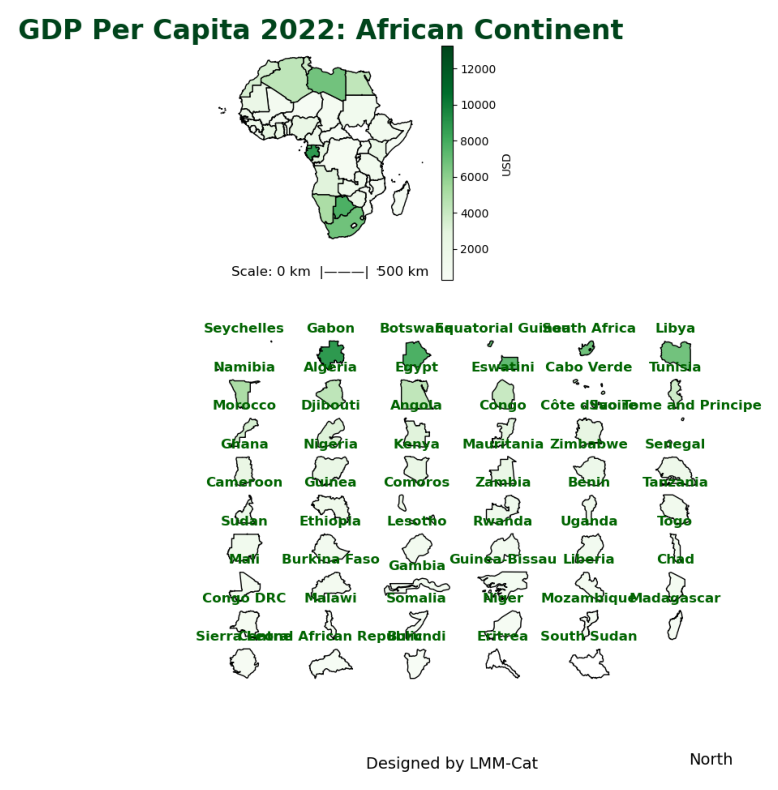

In [77]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 5

Revising the map, trial 1 / 1
Current map issues:
1. The title's visibility could be enhanced by adjusting the font style or adding effect.
2. The scale bar lacks clarity in terms of units; it mentions "0 km" which might be misleading without adequate metric indication.
3. The north arrow and the text 'North' could be stylized and positioned for better visibility.
4. The map lacks a legend for each individual country in the matrix, causing confusion about which color corresponds to which GDP value.
5. The color contrast between the map background and the country colors could be improved for better visual appeal and readability.
6. The alignment of the map elements such as the title, north arrow, and scale bar could be better synchronized for a tidy and professional look.
7. The map borders and margins could use refinement to ensure the map elements are well-framed and visually balanced.

Improvement:
1. Increase the title font size and change the font style for better visibility.
2. Co

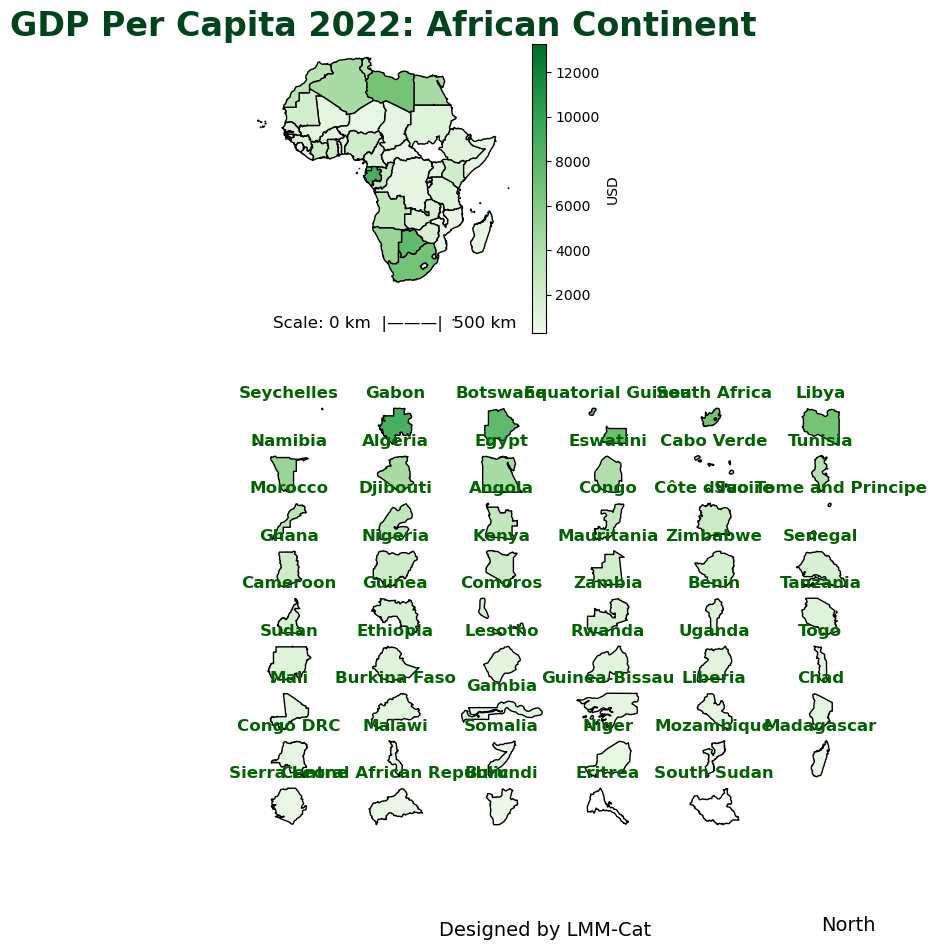



--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Reading GDP data
gdp_data = gpd.read_file("E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Cat/ESRI_countries_4326_GDP.gpkg")

# Filtering African countries
africa_gdp_data = gdp_data[gdp_data['UN_Geodata_simplified_georeg'] == 'AFR']

# Ordering based on GDP
ordered_gdp_data = africa_gdp_data.sort_values(by='country_per_capita_GDP_2022', ascending=False)

# Normalization and color map configuration
norm = Normalize(vmin=ordered_gdp_data['country_per_capita_GDP_2022'].min(), vmax=ordered_gdp_data['country_per_capita_GDP_2022'].max())
cmap = LinearSegmentedColormap.from_list('GDP_color_map', ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c'])

# Figure and grid specs
fig = plt.figure(figsize=(8, 11))  # Letter size
gs = fig.add_gridspec(nrows=18, ncols=6)

# Continental map
continent_ax = fig.add_subplot(gs[:9, :3])
africa_gdp_data.plot(ax=continent_ax, column='country_per_capita_GDP_2022', cmap=cmap, edgecolor='black', linewidth=1)
continent_ax.set_title('GDP Per Capita 2022: African Continent', fontsize=24, fontweight='bold', color='#00441b')
continent_ax.axis('off')

# Color bar configuration
divider = make_axes_locatable(continent_ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('USD')

# Redesigned north arrow
styled_north_arrow = mpatches.FancyArrowPatch((0.88, 0.05), (0.88, 0.15), transform=fig.transFigure, color='black', arrowstyle='-|>', linewidth=2)
continent_ax.add_patch(styled_north_arrow)
continent_ax.text(0.88, 0.02, 'North', horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=14)

# Redesigned scale bar
continent_ax.text(0.1, 0.02, 'Scale: 0 km  |———|  500 km', fontsize=12, transform=continent_ax.transAxes, color='black')

# Individual country plotting
for j in range(54):
    ax = fig.add_subplot(gs[9 + (j // 6), (j % 6)])
    if j < len(ordered_gdp_data):
        country_data = ordered_gdp_data.iloc[j]
        temp_gdf = gpd.GeoDataFrame([country_data], geometry=[country_data.geometry], crs=ordered_gdp_data.crs)
        temp_gdf.plot(ax=ax, color=[cmap(norm(country_data['country_per_capita_GDP_2022']))], edgecolor='black')
        ax.set_title(country_data['COUNTRY'], fontsize=12, fontweight='bold', color='darkgreen')
    ax.axis('off')

# Designer credit
fig.text(s='Designed by LMM-Cat', x=0.5, y=0.01, fontsize=14, transform=fig.transFigure, ha='center')

# Save the result
plt.savefig('output_map.png', dpi=100, bbox_inches='tight')
plt.show()

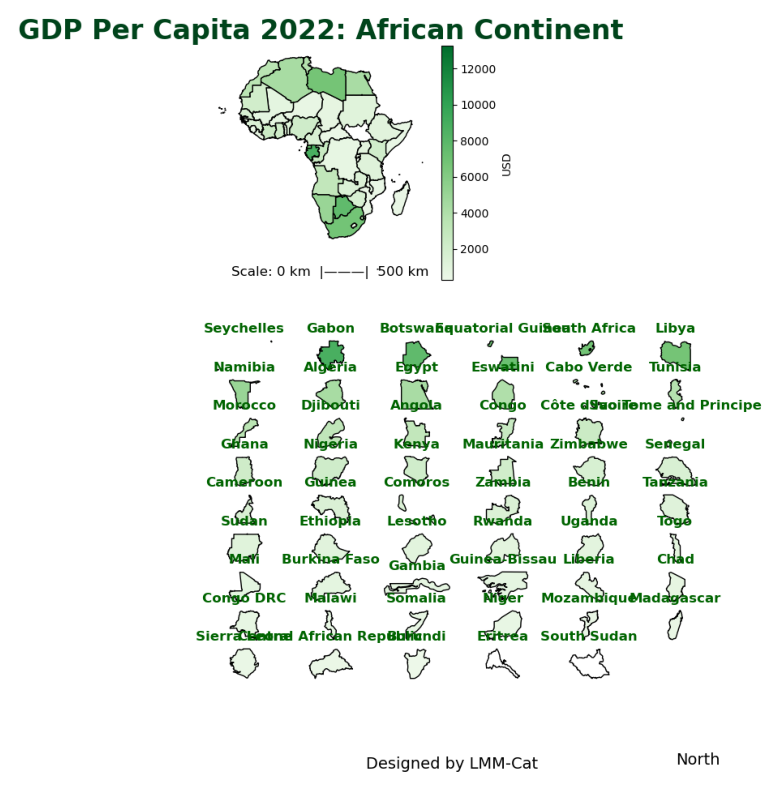

In [78]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

In [79]:
STOP

NameError: name 'STOP' is not defined

# Tools


## load a solution

In [ ]:

# import pickle

# saved_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Census_map\Census_map.pkl"
# file = open(saved_fname, 'rb')

# solution = pickle.load(file)

# file.close()
# print(solution.task)